# A spam filter using SVM (Support Vector Machine)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import svm
import random
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import dump_svmlight_file

## Part A: Build a spam filter using a pre-processed dataset

In [6]:
data_spam = pd.read_csv("C:/MLL9/spambase.txt",
                   header=None, names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','label'])


In [7]:
data_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
data_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#### Converting the data into libsvm format

In [9]:
dump_svmlight_file(data_spam.ix[:,0:-1],data_spam.ix[:,-1],'spam.dat',zero_based=False,multilabel=False)

df = pd.read_csv('spam.dat', header=None)
df.head()

C:\Anacounda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,0
0,1 2:0.64 3:0.64 5:0.32 12:0.64 16:0.32 18:1.29...
1,1 1:0.21 2:0.28 3:0.5 5:0.14 6:0.28 7:0.21 8:0...
2,1 1:0.06 3:0.71 5:1.23 6:0.19 7:0.19 8:0.12 9:...
3,1 5:0.63 7:0.31 8:0.63 9:0.31 10:0.63 11:0.31 ...
4,1 5:0.63 7:0.31 8:0.63 9:0.31 10:0.63 11:0.31 ...


#### Test and Train split

In [6]:
data_train = data_spam.sample(frac=0.7, random_state=150)
data_test = data_spam.drop(data_train.index)
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)
print (data_train.shape, data_test.shape)

(3221, 58) (1380, 58)


In [7]:
##separating X and Y
data_train_X = data_train.drop(["label"], axis=1)
data_train_Y = data_train["label"]

data_test_X = data_test.drop(["label"], axis=1)
data_test_Y = data_test["label"]

# ##normalizing the feature dataset

data_train_X = (data_train_X - data_train_X.mean())/(data_train_X.std()+0.000001)
data_test_X = (data_test_X - data_test_X.mean())/(data_test_X.std()+0.000001)


#### Fitting SVM model 

In [8]:
clf = svm.SVC(C=10,)

In [9]:
clf.fit(data_train_X, data_train_Y) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Test Data Score

In [10]:
pred = clf.predict(data_test_X)

In [11]:
clf.score(data_test_X, data_test_Y)

0.92971014492753623

In [12]:
pd.crosstab(pred, data_test_Y)

label,0,1
row_0,,
0,780,73
1,24,503


#### Grid Search-1

In [13]:
C_range = [1,5,10,20,100]
gamma_range = [1,5,10,20,50]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_svm_grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=5 )

In [14]:
clf_svm_grid.fit(data_train_X, data_train_Y) 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 20, 100], 'gamma': [1, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Best Grid Search Parameters

In [15]:
clf_svm_grid.best_params_

{'C': 5, 'gamma': 1}

#### Grid Search-2

In [16]:
C_range = [3,4,5,6,7]
gamma_range = [0.1,0.5,1,1.5,2]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_svm_grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=5 )
clf_svm_grid.fit(data_train_X, data_train_Y) 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [3, 4, 5, 6, 7], 'gamma': [0.1, 0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
clf_svm_grid.best_params_, clf_svm_grid.best_score_

({'C': 5, 'gamma': 0.1}, 0.90344613474076374)

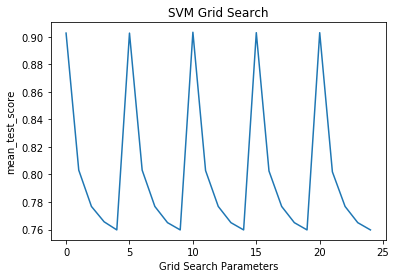

In [18]:
plt.plot(clf_svm_grid.cv_results_["mean_test_score"])
# plt.xticks(np.arange(1,10))
plt.ylabel("mean_test_score")
plt.xlabel("Grid Search Parameters")
plt.title("SVM Grid Search")

In [19]:
scores = clf_svm_grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
scores

array([[ 0.90282521,  0.80316672,  0.7767774 ,  0.76560075,  0.75970196],
       [ 0.90282521,  0.80316672,  0.7767774 ,  0.76497982,  0.75970196],
       [ 0.90344613,  0.80285626,  0.7767774 ,  0.76497982,  0.75970196],
       [ 0.90313567,  0.80254579,  0.7767774 ,  0.76497982,  0.75970196],
       [ 0.90313567,  0.80192487,  0.7767774 ,  0.76497982,  0.75970196]])

#### Fitting the model using the optimal parameters 

In [20]:
clf = svm.SVC(C=5, gamma=0.1)
clf.fit(data_train_X, data_train_Y) 

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
pred = clf.predict(data_test_X)
clf.score(data_test_X, data_test_Y)

0.90652173913043477

In [22]:
pd.crosstab(pred, data_test_Y)

label,0,1
row_0,,
0,786,111
1,18,465


## Part B: Pre-processed a dataset and learn SVM

In [24]:
data = []
for line in open("SMSSpamCollection.txt", "r"):
    data.append(line.split("\t"))

In [25]:
data = np.array(data)
data.shape

(5574, 2)

In [26]:
data2 =  pd.DataFrame(data, columns=['class','text'])
data2.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
data2['text'] = data2['text'].apply(lambda x: x.replace('the',"").replace('The',"").replace('a',"").replace('A',"").replace('is',"").replace('an',"").replace('this',""))

data2.head()

,class,text
0,ham,"Go until jurong point, crzy.. vilble only in b..."
1,ham,Ok lr... Joking wif u oni...\n
2,spam,Free entry in 2 wkly comp to win F Cup finl t...
3,ham,U dun sy so erly hor... U c lredy n sy...\n
4,ham,"Nh I don't think he goes to usf, he lives roun..."


#### Creating features from text ( Count of words)

In [28]:
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(data2['text'].values)

In [29]:
train_index = random.sample(range(len(data2)), np.int((len(data2)*0.7)))

data_train = data2.ix[train_index]
data_test = data2.drop(data_train.index)

counts_train = counts[train_index,:]
counts_test = counts[data_test.index,:]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [30]:
clf = svm.SVC(C=70, gamma=0.01)
clf.fit(counts_train, data_train['class']) 

SVC(C=70, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
pred = clf.predict(counts_test)

In [32]:
pd.crosstab(pred, data_test['class'])

class,ham,spam
row_0,,
ham,1442,21
spam,4,206


In [33]:
pred = clf.predict(counts_train)

In [34]:
pd.crosstab(pred, data_train['class'])

class,ham,spam
row_0,,
ham,3381,0
spam,0,520


#### Grid Search for SVM

In [35]:
C_range = [1,10,20,30, 40, 50,70,100]
gamma_range = [1,0.1,0.01]
kernel_range=['rbf','linear']
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)
clf_svm_grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=5 )

In [36]:
clf_svm_grid.fit(counts_train, data_train['class'])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear'], 'C': [1, 10, 20, 30, 40, 50, 70, 100], 'gamma': [1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
clf_svm_grid.best_params_,  clf_svm_grid.best_score_

({'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}, 0.98128684952576262)

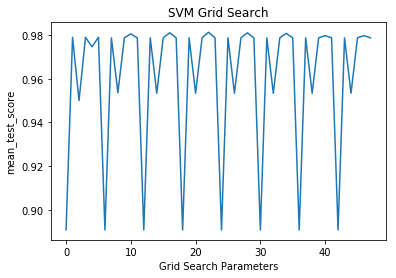

In [38]:
plt.plot(clf_svm_grid.cv_results_["mean_test_score"])
# plt.xticks(np.arange(1,10))
plt.ylabel("mean_test_score")
plt.xlabel("Grid Search Parameters")
plt.title("SVM Grid Search")

#### Fitting the SVM model using the optimal hyper-parameters

In [40]:
clf = svm.SVC(C= 10, gamma= 0.01, kernel= 'rbf')
clf.fit(counts_train, data_train['class']) 

pred = clf.predict(counts_test)
print (clf.score(counts_test, data_test['class']))

pd.crosstab(pred, data_test['class'])

0.982665869695


class,ham,spam
row_0,,
ham,1442,25
spam,4,202


### Compare SVM based spam filter with another model

### Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
depth = [5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
parameters = {'max_depth':depth}
dtree = DecisionTreeClassifier()
clf_tree_grid = GridSearchCV(dtree,parameters, cv=5 )

In [43]:
clf_tree_grid.fit(counts_train, data_train['class'])

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

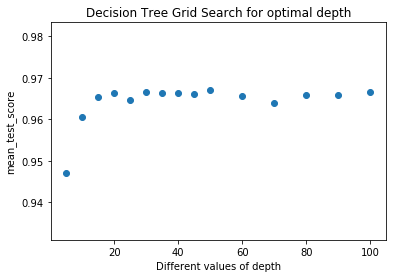

In [44]:
plt.scatter(depth, clf_tree_grid.cv_results_["mean_test_score"])
# plt.xticks(np.arange(1,10))
plt.ylabel("mean_test_score")
plt.xlabel("Different values of depth")
plt.title("Decision Tree Grid Search for optimal depth")

In [45]:
clf_tree_grid.best_params_,  clf_tree_grid.best_score_

({'max_depth': 50}, 0.96718790053832349)

In [46]:
dtree = DecisionTreeClassifier(max_depth=25)
dtree.fit(counts_train, data_train['class'])

pred = dtree.predict(counts_test)
print (dtree.score(counts_test, data_test['class']))

pd.crosstab(pred, data_test['class'])

0.967722653915


class,ham,spam
row_0,,
ham,1430,38
spam,16,189
